# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_1samp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s5e3/sample_submission.csv')

In [3]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [5]:
train.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [6]:
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [7]:
cols = ['pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed']

# **Graphical Representations of Data**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

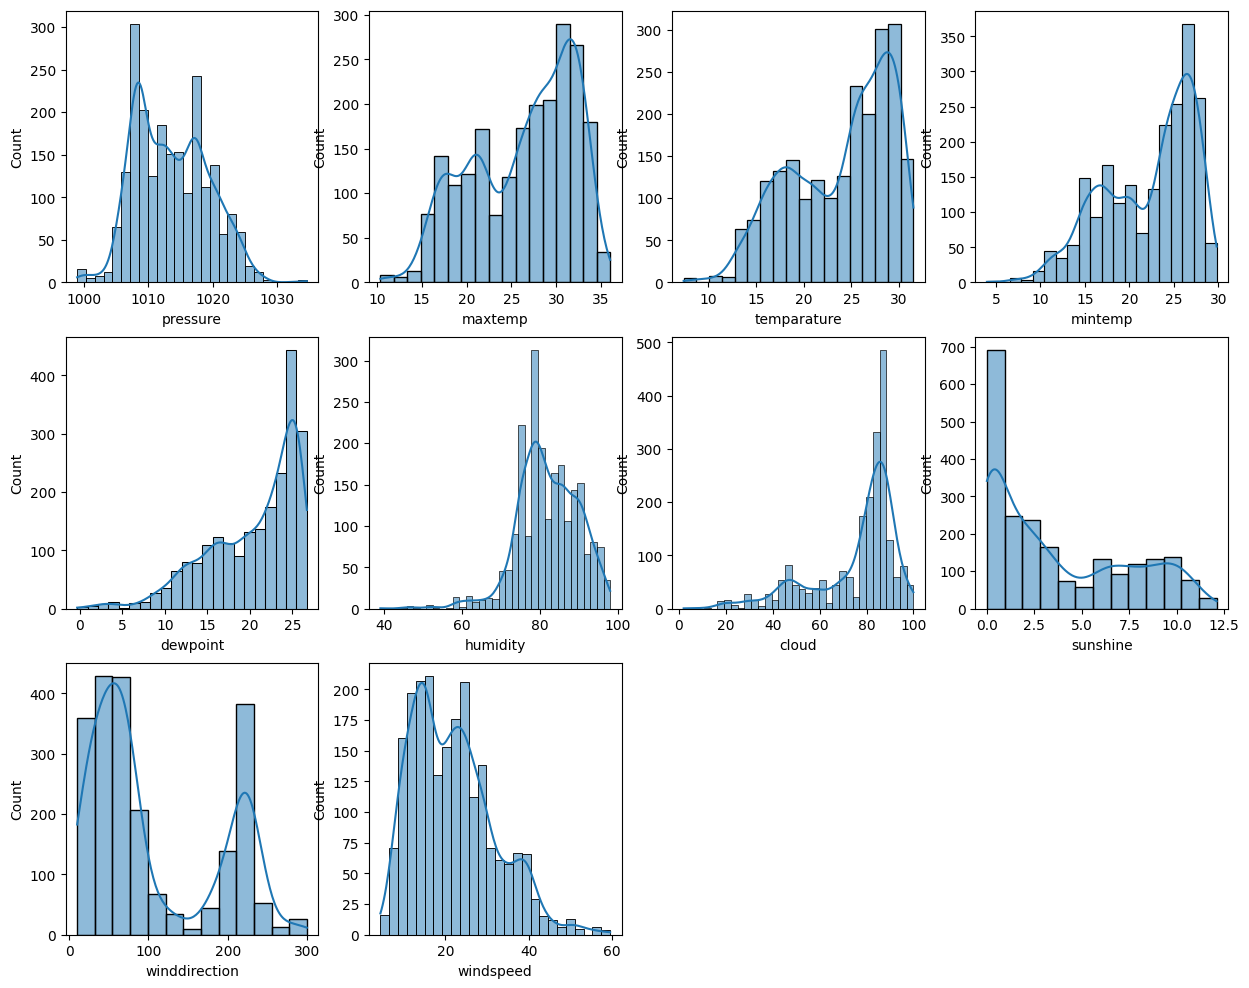

In [8]:
plt.figure(figsize = (15,12))
for i in list(enumerate(cols)):
  plt.subplot(3,4, i[0]+1)
  sns.histplot(data = train, x = i[1], kde = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

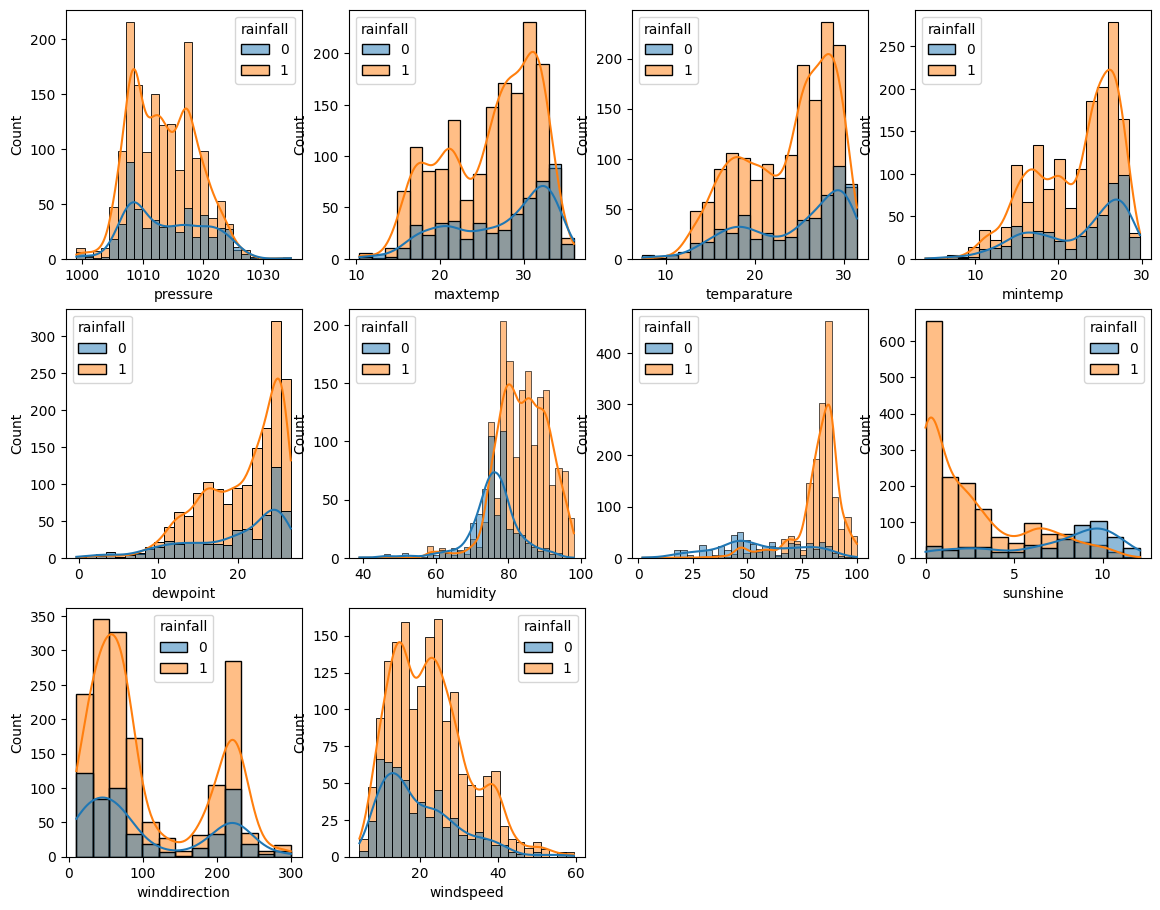

In [9]:
plt.figure(figsize = (14,11))
for i in enumerate(cols):
  plt.subplot(3,4, i[0]+1)
  sns.histplot(data = train, x = i[1], hue = 'rainfall', kde = True)

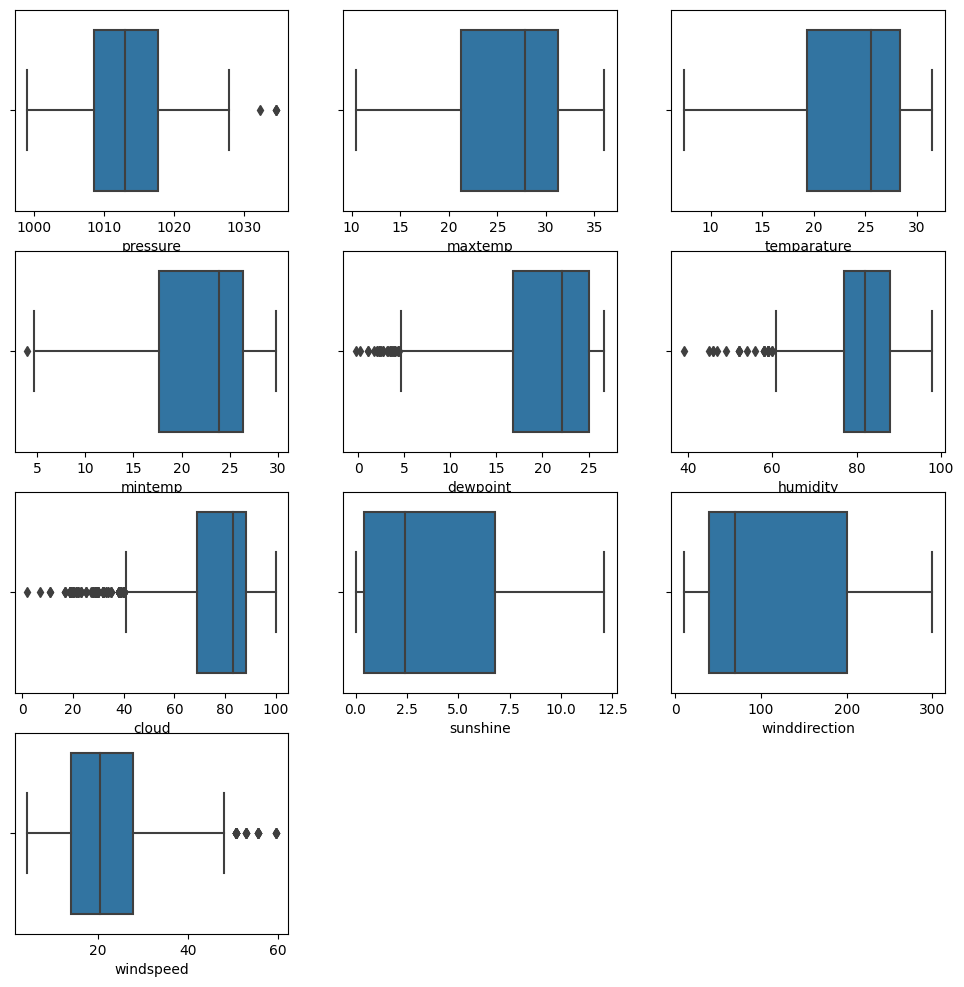

In [10]:
plt.figure(figsize = (12,12))
for i in enumerate(cols):
  plt.subplot(4,3,i[0]+1)
  sns.boxplot(data = train, x = i[1])

pressure. humidity, dewpoint, cloud, windspeed have outliers.

## **Transforming 'day' into a 'Cyclical Feature'**

In [11]:
train['sin_day'] = np.sin( (2 * np.pi * train['day']) / 365)
train['cos_day'] = np.cos((2 * np.pi * train['day']) / 365)
test['sin_day'] = np.sin( (2 * np.pi * test['day']) / 365)
test['cos_day'] = np.cos((2 * np.pi * test['day']) / 365)

In [12]:
train.drop(columns='day', inplace = True)
test.drop(columns='day', inplace = True)
train.drop(columns='id', inplace = True)
test.drop(columns='id', inplace = True)

In [13]:
train.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,sin_day,cos_day
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,0.017213,0.999852
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.034422,0.999407
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,0.051620,0.998667
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,0.068802,0.997630
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,0.085965,0.996298


# **Feature Engineering**

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       2190 non-null   float64
 1   maxtemp        2190 non-null   float64
 2   temparature    2190 non-null   float64
 3   mintemp        2190 non-null   float64
 4   dewpoint       2190 non-null   float64
 5   humidity       2190 non-null   float64
 6   cloud          2190 non-null   float64
 7   sunshine       2190 non-null   float64
 8   winddirection  2190 non-null   float64
 9   windspeed      2190 non-null   float64
 10  rainfall       2190 non-null   int64  
 11  sin_day        2190 non-null   float64
 12  cos_day        2190 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 222.5 KB


<Axes: xlabel='rainfall', ylabel='count'>

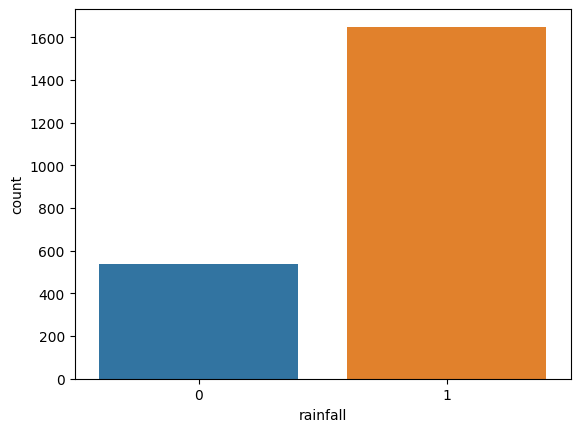

In [15]:
sns.countplot(x = train['rainfall'])

**DATA IS IMBALANCED**

In [16]:
train.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall',
       'sin_day', 'cos_day'],
      dtype='object')

Cloud * Humidity, if both are high, possible rain.

In [17]:
train['cloud_humid'] = train['cloud'] * train['humidity']
test['cloud_humid'] = test['cloud'] * test['humidity']

Dew point Depression

In [18]:
train['dew_pt_dep'] = train['temparature'] - train['dewpoint']
test['dew_pt_dep'] = test['temparature'] - test['dewpoint']

temperature variation

In [19]:
train['temp_variation'] = train['maxtemp'] - train['mintemp']
test['temp_variation'] = test['maxtemp'] - test['mintemp']

feel like temperature

In [20]:
train['feel_like_temp'] = train['temparature'] + 0.33*train['humidity'] - 0.7*train['windspeed'] - 4
test['feel_like_temp'] = test['temparature'] + 0.33*test['humidity'] - 0.7*test['windspeed'] - 4

In [21]:
train.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,sin_day,cos_day,cloud_humid,dew_pt_dep,temp_variation,feel_like_temp
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,0.017213,0.999852,7656.0,1.2,1.3,33.27
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.034422,0.999407,8645.0,1.5,0.4,28.92
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,0.051620,0.998667,3525.0,6.8,4.8,24.18
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,0.068802,0.997630,9025.0,1.0,1.2,20.23
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,0.085965,0.996298,2340.0,8.8,6.1,14.20


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='cloud_humid', ylabel='Count'>

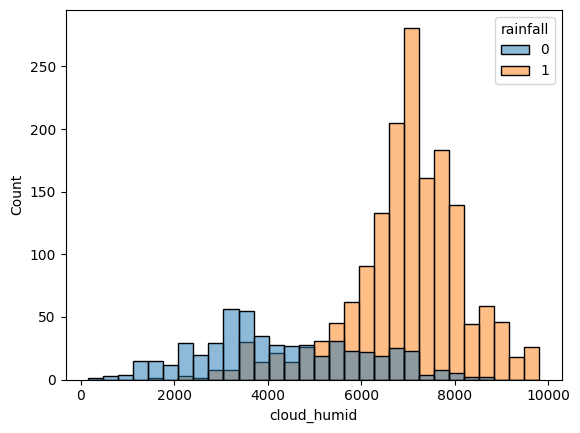

In [22]:
sns.histplot(x =train['cloud_humid'], hue = train['rainfall'])

# **Hypothesis Testing**



* Ho : Mean temperature when rainfall occurs is = 24
* Ha : Mean temperature when rainfall occurs != 24



In [23]:
temp_at_rain = train[train['rainfall'] != 0]['temparature']

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temparature', ylabel='Density'>

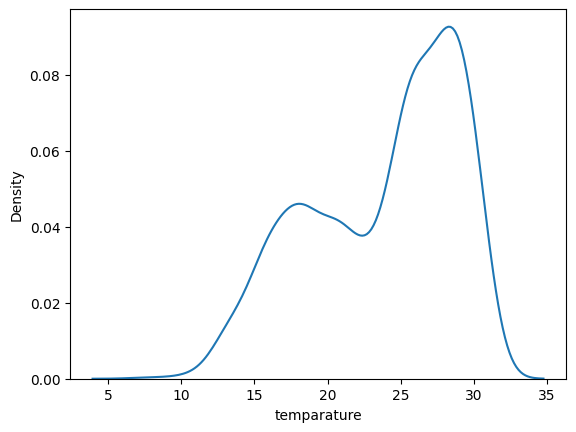

In [24]:
sns.kdeplot(x = temp_at_rain)

In [25]:
shap = shapiro(temp_at_rain)
shap

ShapiroResult(statistic=0.9301652462505152, pvalue=4.4369021647849354e-27)

Since, the distribution is not normal, we're applying Central Limit Theorem.

In [26]:
samples = []
for i in range(15):
  samples.append(temp_at_rain.sample(30).values)

In [27]:
samples = np.array(samples)

In [28]:
# sample distribution of sampling distribution
samples = samples.mean(axis = 1)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

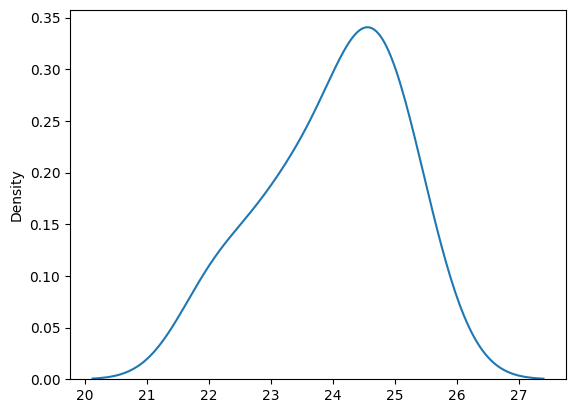

In [29]:
sns.kdeplot(x = samples)

Since the sample is normally distributed, we can say that pop is also normally distributed.(by CLT)

In [30]:
tstat , pval = ttest_1samp(temp_at_rain, 24)
print(f't_statistic = {tstat} p_value = {pval}', end= '\n')

t_statistic = -1.5672133296049495 p_value = 0.1172566990004307


Since p_value > 0.05, we are failed to reject null hypothesis, we don't have enough evidence to support alternate hypothesis.The mean temperature when rain occurs is somewhere around 24.

# **Building Model**

In [31]:
train.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,sin_day,cos_day,cloud_humid,dew_pt_dep,temp_variation,feel_like_temp
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,0.017213,0.999852,7656.0,1.2,1.3,33.27
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.034422,0.999407,8645.0,1.5,0.4,28.92
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,0.051620,0.998667,3525.0,6.8,4.8,24.18
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,0.068802,0.997630,9025.0,1.0,1.2,20.23
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,0.085965,0.996298,2340.0,8.8,6.1,14.20


# **Applying SMOTE**

In [32]:
from imblearn.pipeline import Pipeline
X = train.drop(columns=['rainfall'])
y = train['rainfall']
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [33]:
pipe2 = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('scaler', MinMaxScaler()),
    ('model', GradientBoostingClassifier(learning_rate=0.05,    # Slower learning for better generalization
    max_depth=3,           # Limit tree depth
    subsample=0.8,         # Randomly sample 80% of data per tree  # Randomly sample 80% of features per tree   # Class imbalance ratio (75:25 ≈ 3:1)
    n_estimators=200))
])

In [34]:
pipe2.fit(x_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=200, subsample=0.8))])

In [35]:
y_pred = pipe2.predict_proba(x_test)[:,1]

In [36]:
roc_auc_score(y_test, y_pred)

0.8748452359000025

In [37]:
# dt --> 86.74 max_depth = 4
# rf --> 86.86 n_estim = 60 , max_Depth = 4
# gb --> 87.10 n_estim = 50
# xgb --> 85.427
# lr --> 87.24

# **Using Voting Ensemble**

In [38]:
# pipe2 ---> random forest n_estim = 55

In [39]:
pipe3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', xgb.XGBClassifier())
])

In [40]:
pipe3.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [41]:
gbyp = pipe3.predict_proba(x_test)[:,1]

In [42]:
roc_auc_score(y_test, gbyp)

0.8562998867258502

In [43]:
dt = DecisionTreeClassifier(max_depth=4)
rf = RandomForestClassifier(n_estimators=60, max_depth = 4)
gb = GradientBoostingClassifier(n_estimators=50)
lr = LogisticRegression()

In [44]:
estims = [('clf1', dt), ('clf2', gb), ('clf3', lr)]

In [45]:
vote_pipe = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('scaler', MinMaxScaler()),
    ('model', VotingClassifier(estimators= estims, voting='soft'))
])

In [46]:
vote_pipe.fit(x_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', MinMaxScaler()),
                ('model',
                 VotingClassifier(estimators=[('clf1',
                                               DecisionTreeClassifier(max_depth=4)),
                                              ('clf2',
                                               GradientBoostingClassifier(n_estimators=50)),
                                              ('clf3', LogisticRegression())],
                                  voting='soft'))])

In [47]:
vote_preds = vote_pipe.predict_proba(x_test)[:,1]

In [48]:
roc_auc_score(y_test, vote_preds)

0.8775585469297437

# **Using Stacking**

In [49]:
stack_estims = [('clf1',lr ), ('clf2', dt), ('clf3',rf )]

In [50]:
stack_pipe = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('scaler', MinMaxScaler()),
    ('model', StackingClassifier(estimators=stack_estims, final_estimator=gb, stack_method='predict_proba', cv = 10))
])

In [51]:
stack_pipe.fit(x_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', MinMaxScaler()),
                ('model',
                 StackingClassifier(cv=10,
                                    estimators=[('clf1', LogisticRegression()),
                                                ('clf2',
                                                 DecisionTreeClassifier(max_depth=4)),
                                                ('clf3',
                                                 RandomForestClassifier(max_depth=4,
                                                                        n_estimators=60))],
                                    final_estimator=GradientBoostingClassifier(n_estimators=50),
                                    stack_method='predict_proba'))])

In [52]:
stack_pred = stack_pipe.predict_proba(x_test)[:,1]

In [53]:
roc_auc_score(y_test, stack_pred)

0.8684966149469193

In [54]:
test['winddirection'] = test['winddirection'].fillna(test['winddirection'].mean())

In [55]:
pred = vote_pipe.predict_proba(test)[:, 1]

In [56]:
submission['rainfall'] = pred

In [57]:
submission.to_csv('submission.csv', index = False)
print('success!')

success!
